(app:diodes)=
# Chapter 6 - Diodes
This notebook will lead you through plotting and fitting your diode data. Please read the instructions carefully as you go. The methods used here are a bit more complicated than other experiments. The cell below will load important libraries for doing the analysis. A new library is being imported called `pandas`. This library allows us to read Excel files. It will automatically create arrays in a structure called a dataframe. This will be very handy since we have several experiments that have lots of measurements. Shift-Enter the code cell below to import the necessary libraries.

In [25]:
# import modules
import pandas as pd
import numpy as np
#from numpy import array, arange, pi, exp, sin, cos, polyfit, poly1d, linspace, zeros, flipud
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Create Excel File of Data
Enter your data in Excel in separate sheets. The sheet names should be "zener" and "silicon". In each sheet, make columns "Vo", "VR", "Vd", and "I". The Excel sheets will look like the table below. The numbers below are only an example. You will set $V_o$ on the DC power supply. Then, you will measure $V_R$. Next, you will calculate $V_d = V_o-V_R$  and $I=V_R/R$ in Excel. 

| Vo |  VR | Vd  |  I   |
|:--:|:---:|:---:|:----:|
|-5.0| 0.80| 4.2 |-0.008|
| ...| ... | ... |  ... |
| 1.0| 0.23| 0.77|0.0023|

Save your Excel file as DiodeIVJupyter.xlsx. Upload the Excel file to your online Jupyter platform. Ask your TA or instructor if you need assistance. 

## Read Your File with Pandas
The code below will load your Excel file, but the location of the file may need to be adjusted depending on which Jupyter platform you are using (Google Colab, JupyteLite, etc.). It will print the first few lines of the zener datafram and plot your zener diode data as a check that everything is functioning as expected.

Pandas will load your data into what is called a dataframe. We designate this when we load by calling our dataframes `zener_df` and `silicon_df`.  The columns in the dataframe are your columns from Excel, and they can be referenced by the names you gave them in Excel. For example, in the plotting below, you can see that the zener diode data is referenced by `zener_df['Vd']` and `zener_df['I']`. These are the diode voltage and current, respectively.

In [29]:
#read Excel files with pandas
zener_df = pd.read_csv('zener.csv')
#zener_df = pd.read_excel('DiodeIVJupyter.xlsx', sheet_name='zener', index_col=None, na_values=['NA'])
#silicon_df = pd.read_excel('DiodeIVJupyter.xlsx', sheet_name='silicon', index_col=None, na_values=['NA'])

#print the first few lines
zener_df.head()

#plot the zener data
plt.plot(zener_df['Vd'], zener_df['I'], 'bo')
plt.xlabel('Diode Voltage (V)')
plt.ylabel('Diode Current (A)')
plt.grid(True)
plt.savefig('zener.svg')
plt.show()

OSError: [Errno 22] Invalid argument: 'zener.csv'

## Plot the zener and silicon data
The following code will plot your zener and silicon diode data together so that you can see the differences.

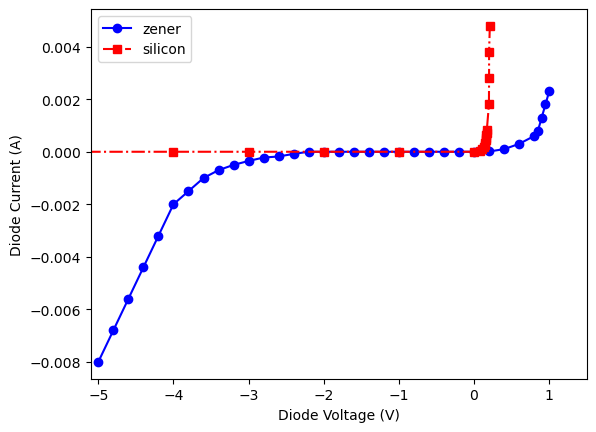

In [9]:
plt.plot(zener_df['Vd'], zener_df['I'], 'b-o', label='zener')
plt.plot(silicon_df['Vd'], silicon_df['I'], 'r-.s', label='silicon')
plt.xlabel('Diode Voltage (V)')
plt.ylabel('Diode Current (A)')
plt.xlim(-5.1, 1.5)
plt.legend(loc=0)
plt.show()

# Transcendental Solution
This doesn't seem to work. I'm not sure what I'm doing wrong.

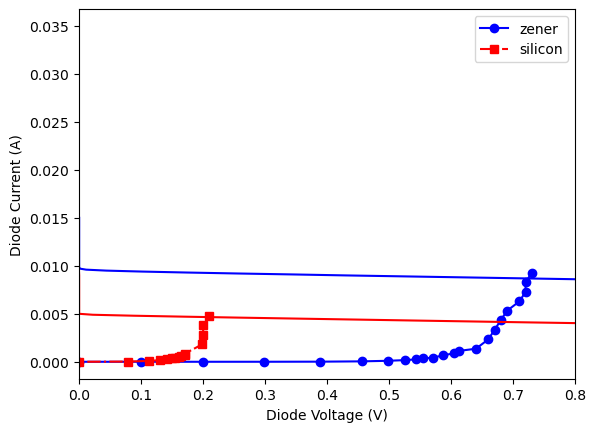

In [4]:
zener_df['VsIs']= (zener_df['Vin'].max()-zener_df['Vin'])/1000
silicon_df['VsIs']= (silicon_df['Vin'].max()-silicon_df['Vin'])/1000

plt.plot(zener_df['Vd'], zener_df['I'], 'b-o', label='zener')
plt.plot(zener_df['VR'], zener_df['VsIs'], '-b')
plt.plot(silicon_df['Vd'], silicon_df['I'], 'r-.s', label='silicon')
plt.plot(silicon_df['VR'], silicon_df['VsIs'], '-r')

plt.xlabel('Diode Voltage (V)')
plt.ylabel('Diode Current (A)')
plt.xlim(0, 0.8)
plt.legend(loc=0)
plt.show()

[ 0.08613873 -0.05422254] [[ 3.00443210e-05 -2.07639640e-05]
 [-2.07639640e-05  1.43758736e-05]]
[ 0.149  -0.0265] [[ 0.0075     -0.001525  ]
 [-0.001525    0.00031025]]


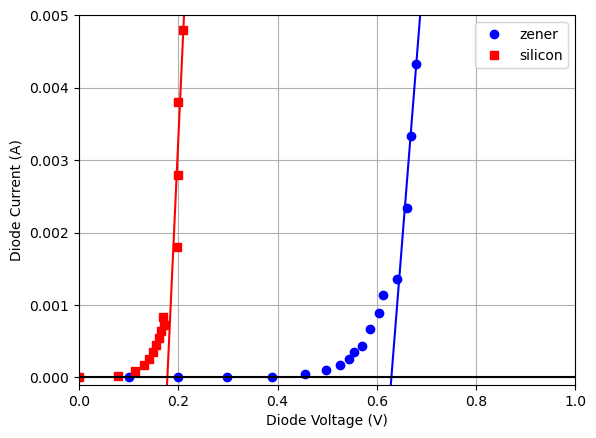

In [16]:
# curve_fit optization
def f_line(x, a, b):
    return a*x + b

a = 0.01
b = -1

#Get zener fit
xtemp = zener_df['Vd'].loc[zener_df['Vd'] > 0.63]
ytemp = zener_df['I'].loc[zener_df['Vd'] > 0.63]
zener_params, zener_pcov = curve_fit(f_line, xtemp, ytemp, (a,b))

#Get silicon fit
xtemp = silicon_df['Vd'].loc[silicon_df['Vd'] > 0.199]
ytemp = silicon_df['I'].loc[silicon_df['Vd'] > 0.199]
silicon_params, silicon_pcov = curve_fit(f_line, xtemp, ytemp, (a,b))

#Print fit params
print(zener_params, zener_pcov)
print(silicon_params, silicon_pcov)

#Plot the results
xx = linspace(0,1, 200)
plt.plot(zener_df['Vd'], zener_df['I'], 'bo', label='zener')
plt.plot(xx, f_line(xx, *zener_params), '-b')
plt.plot(silicon_df['Vd'], silicon_df['I'], 'rs', label='silicon')
plt.plot(xx, f_line(xx, *silicon_params), '-r')
plt.hlines(0, 1, 0, linestyle='solid', color='black')
plt.legend(loc=0)
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(-0.0001,0.005)
plt.xlabel('Diode Voltage (V)')
plt.ylabel('Diode Current (A)')
plt.savefig('diodeIVfit.svg')
plt.show()

In [6]:
zener_V_on = -zener_params[1]/zener_params[0]
silicon_V_on = -silicon_params[1]/silicon_params[0]
print(zener_V_on, silicon_V_on)

0.6294792647914049 0.1778523489932824


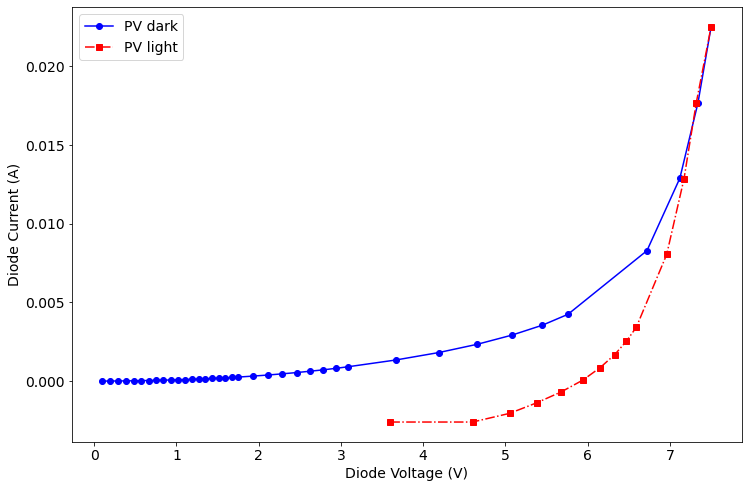

In [ ]:
plt.plot(PV_nolight_df['Vd'], PV_nolight_df['I'], 'b-o', label='PV dark')
plt.plot(PV_light_df['Vd'], PV_light_df['I'], 'r-.s', label='PV light')
plt.xlabel('Diode Voltage (V)')
plt.ylabel('Diode Current (A)')
#plt.xlim(0, 0.8)
plt.legend(loc=0)
plt.show()

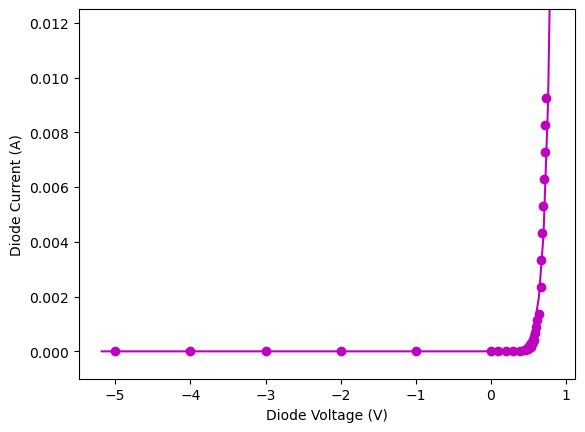

In [5]:
Vtheory=np.linspace(-3, 3, 100)
Itheory= 1e-18*(np.exp((Vtheory)/0.08)-1)

plt.plot(Vtheory-2.18, Itheory, '-m')
plt.plot(zener_df['Vd'], zener_df['I'], 'mo')
plt.xlabel('Diode Voltage (V)')
plt.ylabel('Diode Current (A)')
plt.ylim(-0.001, 0.0125)
plt.savefig('diodemodel.svg')
plt.show()